# Maximum Likelihood and related topics
###### By Rohit Pardasani
<hr>

In statistics and machine learning : <br>
We generally draw samples from an underlying population which has a distribution. <br>
This distribution has obviously will have some parameters, which might be unknown. <br>
We may just have a sample set drawn from the distribution and we may just know the type of distribution, but nothing about the parameters of distribution <br>
How do we estimate parameters of distribution from a sample set drawn from the distribution ? <br>
## Likelihood Function
Let's say we draw a sample with value $x$ from a distribution with some paramter value as $\theta$ (it's unknown).<br>
What is probability that value of parameter value is $\theta$ given that sample x was drawn from distribution<br>
$\mathcal{L(\theta|x)}$ = Likelihood of $\theta$ given $x$ = $P(X=x|\theta)$ <br>
Since this is not conditional probability, therefore written as :<br>
$\mathcal{L(\theta|x)} = p_\theta(x) = P_\theta(X=x) = P(X=x;\theta)$ in discrete case<br>
$\mathcal{L(\theta|x)} = f_\theta(x)$ in continuous case<br>
<br>
What happens when we draw more than one sample ?<br>
The likelihood function (often simply called the likelihood) describes the joint probability of the observed data as a function of the parameters of the chosen statistical model.<br>
$\mathcal{L}(\theta|x)$, here $x$ is not a single sample but a dataset say $\mathcal{L}(\theta|x_1,x_2,x_3..x_n)$

#### Example:
We draw $n$ samples from a Bernoulli Distribution which has success probability of $p_0$.<br>
$p_0$ is unknown to us<br>
We just have samples $x_1,x_2,x_3.....,x_n$<br>
Since samples are from Bernoulli Distribution, $x_i$ could be either 1 or 0 <br>
Let us assumme that success probability is $p$ for the underlying distribution <br>
$\mathcal{L(p|x)}$ = Probability of getting set of $x_i$'s if success proability is $p$ <br>
$\mathcal{L(p|x)}$ = $P(x_1;p)P(x_2;p)P(x_3;p)...P(x_n;p)$ (since all events are independent of each other)<br><br>
Let's say out of $n$ $x_i$'s, k are 1 and rest are 0 <br>
$\mathcal{L(p|x)} = p^k(1-p)^{n-k}$ <br>

#### Log Likelihood
We also define <b>log of likelihood</b> as:<br>
$log (\mathcal{L}(p|x)) = l(p|x) = k log (p) + (n-k)log(1-p)$ (Log is generally natural log)<br> 

### Maximum Likelihood Estimate (MLE)
Maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. <br>
This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.<br>
The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate.<br>
MLE of $\theta$ = $\hat{\theta} = \underset{\theta\in\Theta}{\arg\max}\mathcal{L(\theta|x)}$<br>
Or we can also use log likelihood<br>
MLE of $\theta$ = $\hat{\theta} = \underset{\theta\in\Theta}{\arg\max} \mathcal{l(\theta|x)}$ <br>
Can be calculated by putting <br>
$\frac{\partial \mathcal{L}(\theta|x)}{\partial \theta} = 0$<br>
OR<br>
$\frac{\partial \mathcal{l}(\theta|x)}{\partial \theta} = 0$<br>

### From the likelihood function in above Bernoulli Distribution example calculating MLE of p<sub>0</sub>
<img src='mle.jpg' width='400'>

## Mixture Model
A mixture model is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set should identify the sub-population to which an individual observation belongs. <br><br>
## Gaussian Mixture Model (GMM)
Here the undelying population distribution is a mixture of Gaussians.<br>
Generally, we have samples from this mixture distribution but don't know the parameters of this distribution.<br>
Finding the undelying mixture Gaussian distribution can categorized as a clustering algorithm.<br>

#### Example:<br>
Consider that we draw n samples from the distribution show below <br>
The below distribution is a mixture of two Gaussian distributions $f_1(x)$ and $f_2(x)$<br>
$f(x) = \lambda_1f_1(x)+\lambda_2f_2(x)$<br><br>
$f_1(x) = \frac{1}{\sigma_1\sqrt{2\pi}}\exp\left( -\frac{1}{2}\left(\frac{x-\mu_1}{\sigma_1}\right)^{\!2}\,\right)$<br>
$f_2(x) = \frac{1}{\sigma_2\sqrt{2\pi}}\exp\left( -\frac{1}{2}\left(\frac{x-\mu_2}{\sigma_2}\right)^{\!2}\,\right)$<br>
Generally, $\lambda_1$,$\lambda_2$,$\mu_1$,$\mu_2$,$\sigma_1$,$\sigma_2$ will be unknown.


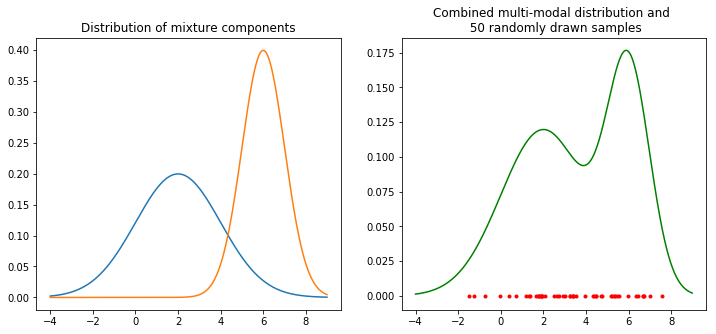

In [92]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from numpy.random import choice
np.random.seed(3)
x = np.arange(-4,9,0.01)
y1 = norm.pdf(x,loc=2,scale=2)
y2 = norm.pdf(x,loc=6,scale=1)
figure, axis = plt.subplots(1, 2,figsize=(12,5))
y = 0.6*y1 + 0.4*y2
list_of_candidates = x
number_of_items_to_pick = 50
probability_distribution = y/sum(y)
draw = choice(list_of_candidates,number_of_items_to_pick,p=probability_distribution,replace=True)
axis[0].plot(x,y1)
axis[0].plot(x,y2)
axis[0].set_title('Distribution of mixture components')
axis[1].plot(x,y,color='green')
axis[1].scatter(draw,np.array([0]*len(draw)),marker='.',color='red')
axis[1].set_title('Combined multi-modal distribution and \n 50 randomly drawn samples')
plt.show()

## Maximum Likelihood Expectation Maximization (MLEM)
The expectation-maximization algorithm is an approach for performing maximum likelihood estimation in the presence of latent variables.<br> 
It does this by first estimating the values for the latent variables, then optimizing the model, then repeating these two steps until convergence.<br> 
It is an effective and general approach and is most commonly used for density estimation with missing data, such as clustering algorithms like the Gaussian Mixture Model.<br>
### Using MLEM for estimating parameters of GMM

<img src='gmm-1.jpg' width='600'>
<img src='gmm-2.jpg' width='600'>
<img src='gmm-3.jpg' width='600'>
<img src='gmm-4.jpg' width='600'>


### Fitting Gaussian Mixture Model using sklearn 
<b>(which uses EM Algorithm for finding parameters)</b><br>

Consider that we draw 300 samples from the distribution show below <br>
The below distribution is a mixture of two Gaussian distributions $f_1(x)$ and $f_2(x)$<br>
$f(x) = \lambda_1f_1(x)+\lambda_2f_2(x)$<br><br>
$f_1(x) = \frac{1}{\sigma_1\sqrt{2\pi}}\exp\left( -\frac{1}{2}\left(\frac{x-\mu_1}{\sigma_1}\right)^{\!2}\,\right)$<br>
$f_2(x) = \frac{1}{\sigma_2\sqrt{2\pi}}\exp\left( -\frac{1}{2}\left(\frac{x-\mu_2}{\sigma_2}\right)^{\!2}\,\right)$<br>
Let's assume that <br>
$\mu_1 = 2$<br>
$\mu_2 = 6$<br>
$\sigma_1 = 2,{\sigma_1}^{2} = 4 $<br>
$\sigma_2 = 1,{\sigma_2}^{2} = 1 $<br>
$\lambda_1 = 0.6$<br>
$\lambda_2 = 0.4$<br>

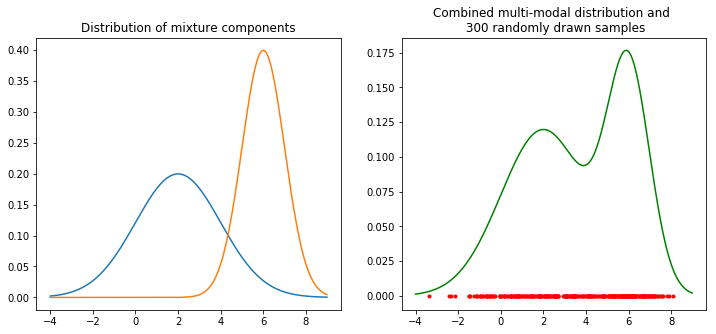

In [99]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from numpy.random import choice
np.random.seed(7)
x = np.arange(-4,9,0.01)
y1 = norm.pdf(x,loc=2,scale=2)
y2 = norm.pdf(x,loc=6,scale=1)
figure, axis = plt.subplots(1, 2,figsize=(12,5))
y = 0.6*y1 + 0.4*y2
list_of_candidates = x
number_of_items_to_pick = 300
probability_distribution = y/sum(y)
draw = choice(list_of_candidates,number_of_items_to_pick,p=probability_distribution,replace=True)
axis[0].plot(x,y1)
axis[0].plot(x,y2)
axis[0].set_title('Distribution of mixture components')
axis[1].plot(x,y,color='green')
axis[1].scatter(draw,np.array([0]*len(draw)),marker='.',color='red')
axis[1].set_title('Combined multi-modal distribution and \n 300 randomly drawn samples')
plt.show()

In [100]:
from sklearn.mixture import GaussianMixture
drawX = draw.reshape(-1,1)
gm = GaussianMixture(n_components=2, random_state=0).fit(drawX)
print('After fitting the model :\n')
print('Mixture Component 1:  Coeff= %.2f,  Mean=%.2f  Var=%.2f\n'%(gm.weights_[1], gm.means_[1][0], gm.covariances_[1][0][0]))
print('Mixture Component 2:  Coeff= %.2f,  Mean=%.2f  Var=%.2f\n'%(gm.weights_[0], gm.means_[0][0], gm.covariances_[0][0][0]))

After fitting the model :

Mixture Component 1:  Coeff= 0.56,  Mean=1.66  Var=3.25

Mixture Component 2:  Coeff= 0.44,  Mean=5.86  Var=1.05

